E:\python3.11\Lib\site-packages\rasterio\__init__.py:319: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


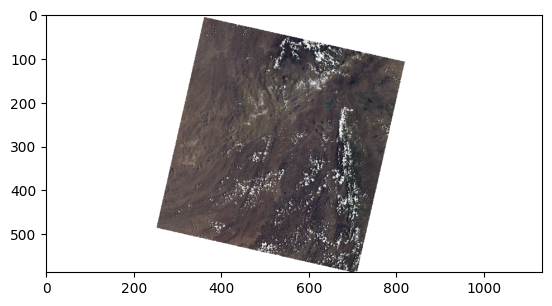

<Axes: >

In [2]:
import rasterio
from rasterio.plot import show
# import rasterio
import geotiff
import tifffile
from PIL import Image
img = rasterio.open("E:\MHRS\LAB DATA\COMPOSITE.tif")
show(img)
# pixels = img.load()

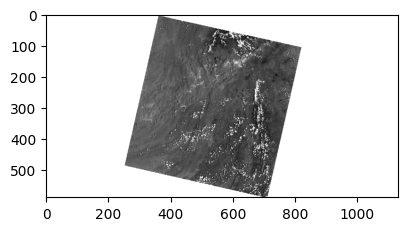

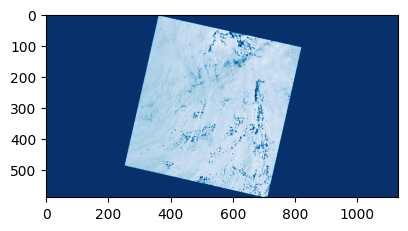

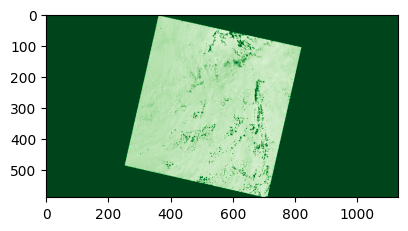

In [3]:
#READING MULTIPLE COLORED BANDS
#Grey Band
import matplotlib.pyplot as plt
img_band1 = img.read(1)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(img_band1, cmap='gray')
plt.show()
#Blue band
import matplotlib.pyplot as plt
img_band2 = img.read(2)
fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(2, 2, 2)
ax2.imshow(img_band2, cmap='Blues')
plt.show()
#Green Band
import matplotlib.pyplot as plt
img_band3 = img.read(3)
fig3 = plt.figure(figsize=(10, 10))
ax3 = fig3.add_subplot(2, 2, 3)
ax3.imshow(img_band3, cmap='Greens')
plt.show()

In [4]:
#Readin Band numbers and Image size
import rasterio
with rasterio.open("E:\MHRS\LAB DATA\COMPOSITE.tif") as dataset:
    width = dataset.width
    height = dataset.height
    print("Image Size (Width x Height):", width, "x", height)
    num_bands = dataset.count
    print("Number of Bands:", num_bands)

Image Size (Width x Height): 1133 x 587
Number of Bands: 3


In [5]:
# OBTAINING META DATA
img.crs
metadata=img.meta
print("metadata", metadata)

metadata {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1133, 'height': 587, 'count': 3, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}


In [6]:
#OBTAINING IMAGE DESCRIPTION
desc=img.descriptions
print("Raster Decription: {desc}\n".format(desc=desc))

Raster Decription: (None, None, None)



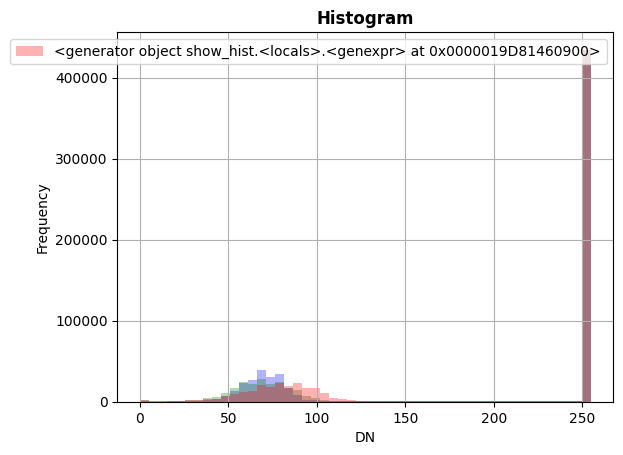

In [7]:
#Histogram of pixel vaLues in each band 
rasterio.plot.show_hist(img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

C:\Users\Amir Zuberi\AppData\Local\Temp\ipykernel_4928\3973758836.py:4: RuntimeWarning: invalid value encountered in divide
  ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)
C:\Users\Amir Zuberi\AppData\Local\Temp\ipykernel_4928\3973758836.py:6: RuntimeWarning: invalid value encountered in divide
  ndvi_clipped2 = np.divide(np.subtract(nir_clipped, red_clipped), np.add(nir_clipped, red_clipped))


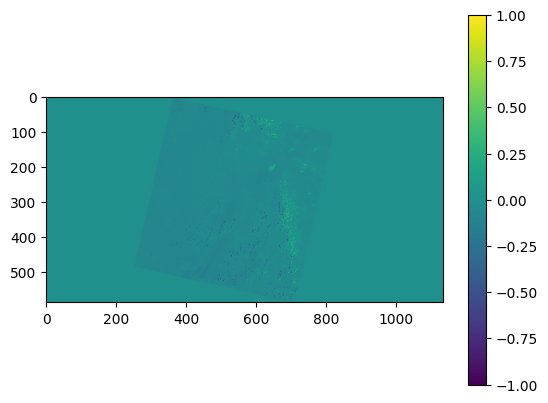

In [9]:
#Calculating NDVI
red_clipped = img[0].astype('f4')
nir_clipped = img[1].astype('f4')
ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)
import numpy as np
ndvi_clipped2 = np.divide(np.subtract(nir_clipped, red_clipped), np.add(nir_clipped, red_clipped))
ndvi_clipped3 = np.nan_to_num(ndvi_clipped2, nan=-1)
plt.imshow(ndvi_clipped3, cmap='viridis')
plt.colorbar()